# Задание 3

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

data, target = load_diabetes(return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 2, 40)

coefs = np.zeros_like(alpha_linspace)
for i in range(len(alpha_linspace)):
    lm = Lasso(alpha_linspace[i])
    lm.fit(data, target)
    coefs[i] = np.sum(np.abs(lm.coef_))

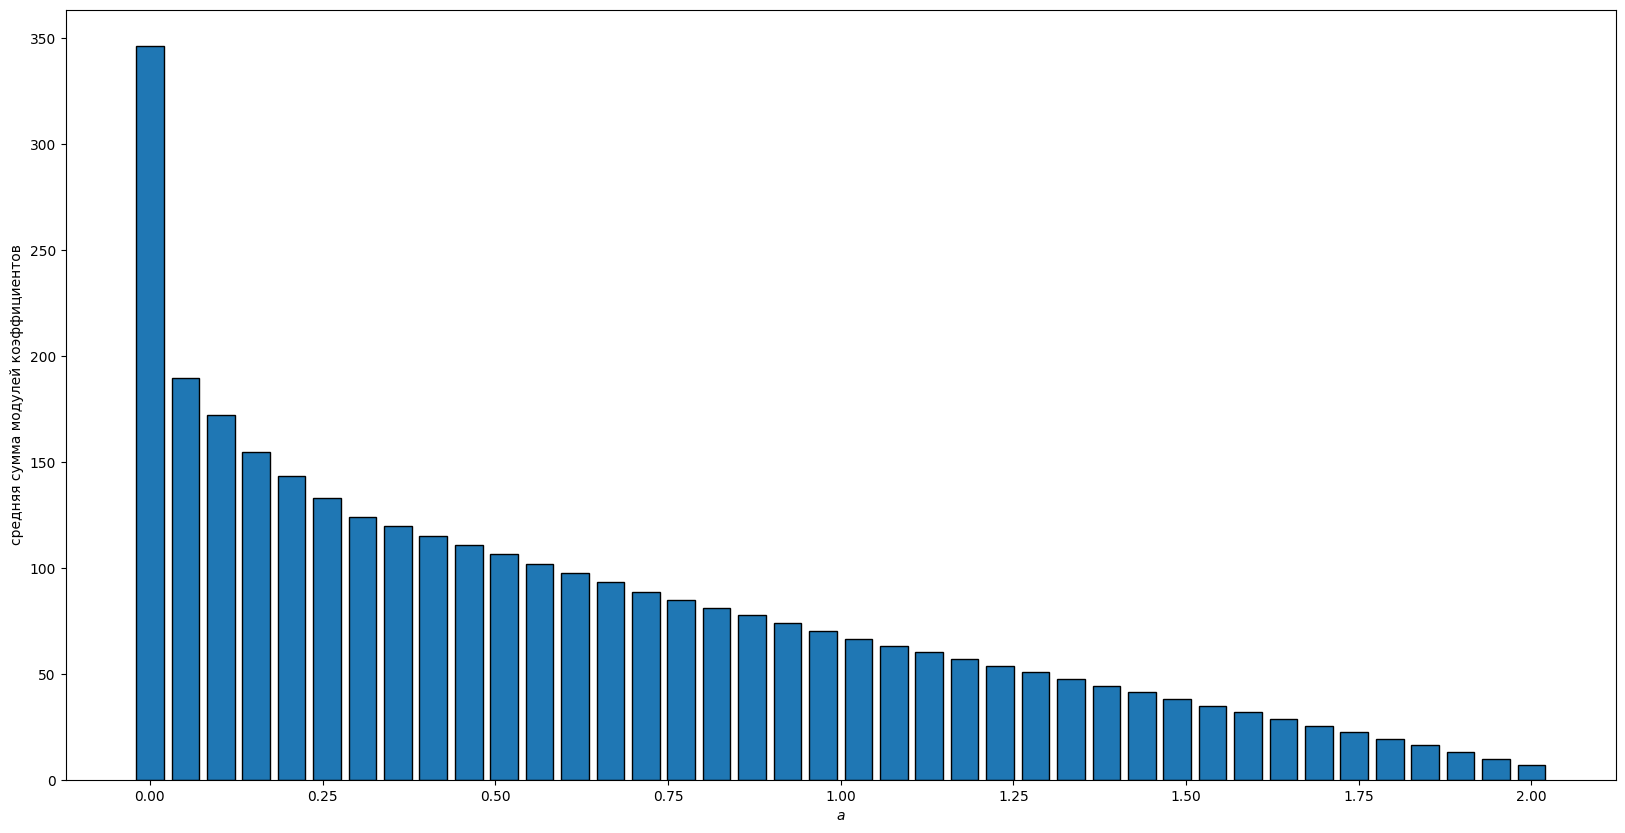

In [6]:
plt.figure(figsize=(20, 10))
plt.bar(alpha_linspace, coefs/10, edgecolor='black', width=1/25)
plt.ylabel('средняя сумма модулей коэффициентов')

plt.xlabel('$a$')
plt.show()

# Задание 4

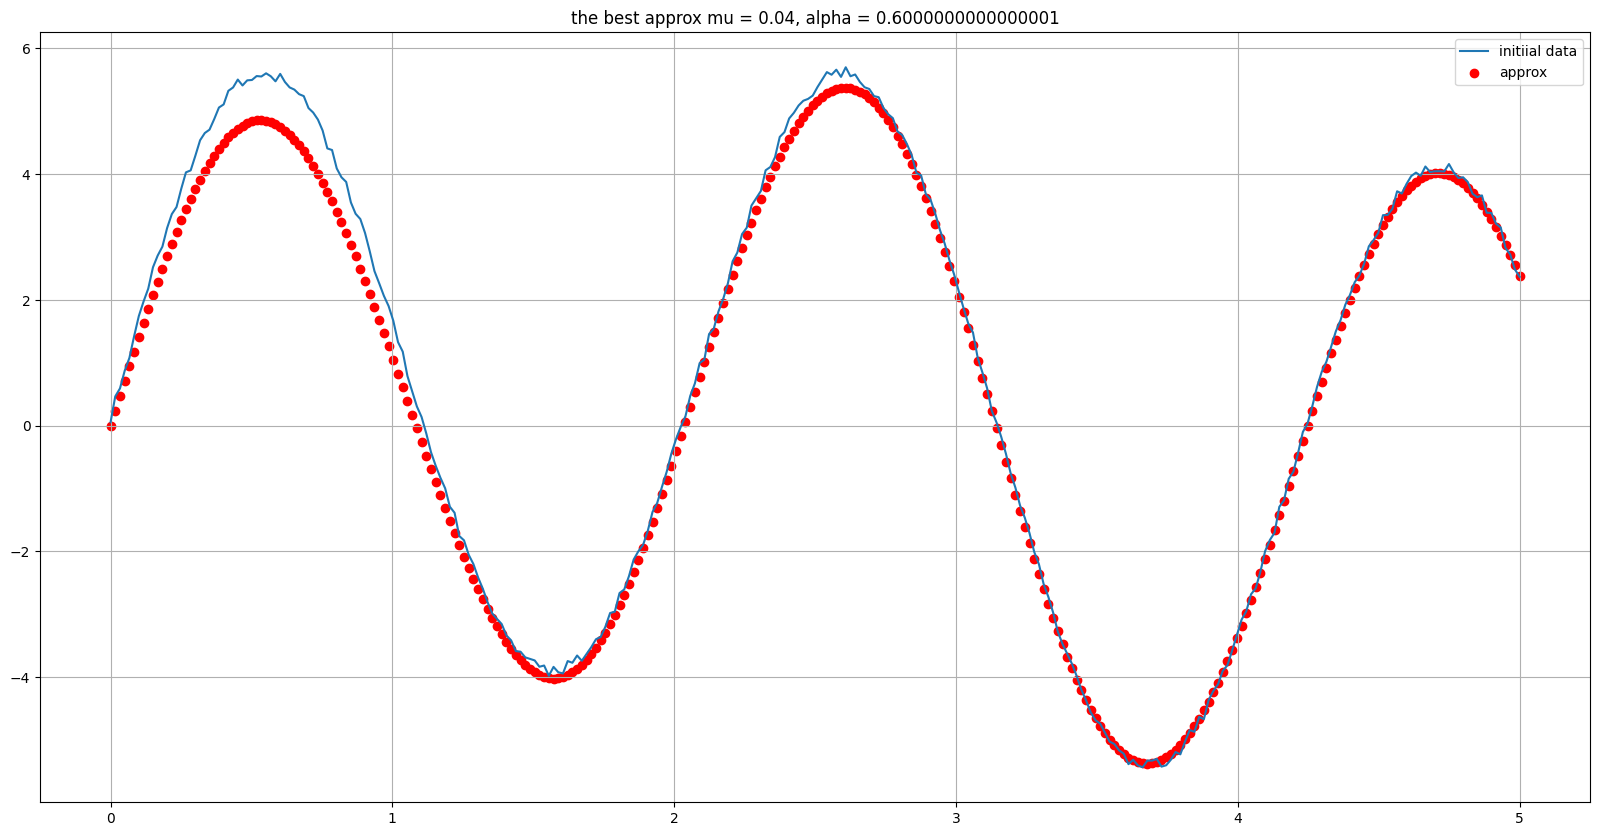

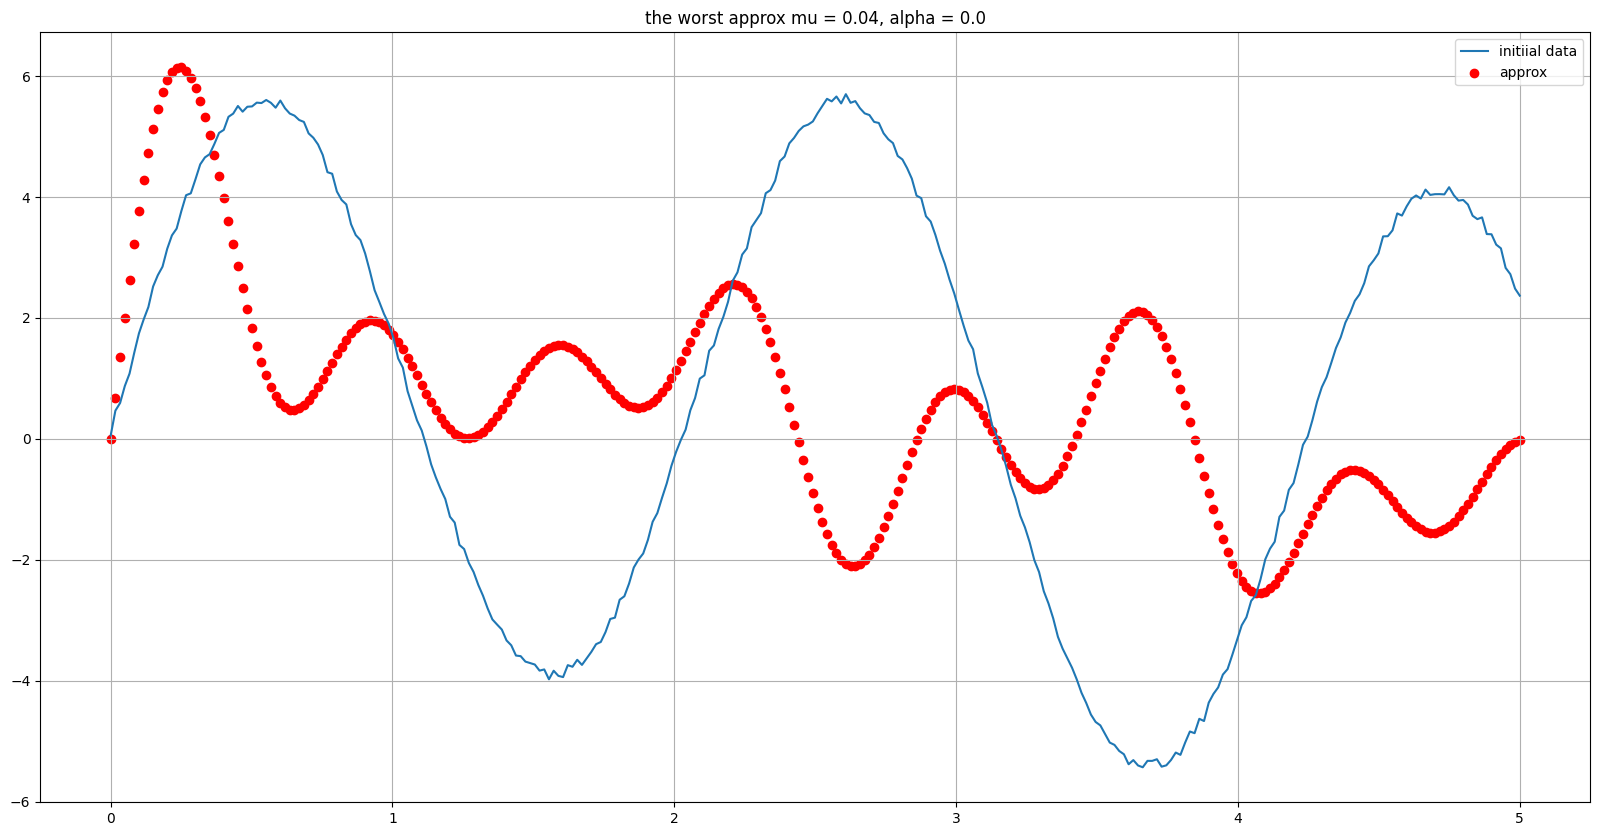

0.20989515387889307
0.24660358760211873


In [79]:
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y).T @ X / X.shape[0] + 2 * mu * np.sign(w).T
    w -= alpha * grad.T
    return w

def L(X, y, w, mu):
    return np.linalg.norm(X @ w - y)**2 / X.shape[0] + mu * np.sum(np.abs(w))

n = 300
x0 = np.linspace(0, 5, n)

y0 = np.sin(x0) + 5 * np.sin(3*x0) + np.random.random(n)*0.2

k = 3

mu_list = np.arange(0, .1, .01)
alpha_list = np.arange(0, 1, .1)



# mu_list = np.array([0.05])
# alpha_list = np.array([0.5])


eps = 1e-4

m = 10

score_list = []
for mu in mu_list:
    for alpha in alpha_list:
        w_final = np.zeros_like(w)
        for i in range(k): 
            x_train = np.delete(x0, np.arange(i*n // k, (i+1) * n // k)).reshape(n - n//k, 1)
            y_train = np.delete(y0, np.arange(i*n // k, (i+1) * n // k)).reshape(n - n//k, 1)

            x_test = x0[i*n // k : (i+1) * n //k]
            y_test = y0[i*n // k : (i+1) * n //k]

            X_train = np.column_stack([np.sin(j * x_train) for j in range(m)])
            X_test = np.column_stack([np.sin(j * x_test) for j in range(m)])
            w = np.random.random((m, 1))* 2
            s = 0
            while(L(X_train, y_train, w, mu) > eps and s < 200):
                w = make_L1_regression_grad_descent_iteration(X_train, y_train, w, mu, alpha)
                s += 1
            w_final += w
        w_final /= 3
        score = np.linalg.norm(y_test.reshape(n//k ,1) - X_test @ w_final)
        score_list.append(score)
        
        if not score_list or score == min(score_list):
            alpha_best, mu_best, w_best = alpha, mu, w_final.copy()
        if not score_list or score == max(score_list):
            alpha_worst, mu_worst, w_worst = alpha, mu, w_final.copy()




X = np.column_stack([np.sin(j * x0) for j in range(m)])

plt.figure(figsize=(20, 10))
plt.plot(x0, y0, label = 'initiial data')
plt.scatter(x0, (X @ w_best), label = 'approx', color = 'red')
plt.grid()
plt.legend()
plt.title(f"the best approx mu = {mu_best}, alpha = {alpha_best}")
plt.show()



plt.figure(figsize=(20, 10))
plt.plot(x0, y0, label = 'initiial data')
plt.scatter(x0, (X @ w_worst), label = 'approx', color = 'red')
plt.grid()
plt.legend()
plt.title(f"the worst approx mu = {mu_worst}, alpha = {alpha_worst}")
plt.show()



print(np.mean(y0.reshape(n, 1) - X @ w_best))
print(np.mean(y0.reshape(n, 1) - X @ w_worst))


